#  'Airline Price Prediction Using Machine Learning' 

1. Goal: To predict airline ticket prices based on different factors like travel dates, times, and other flight details.

2. Information Used:

Date and time of travel (e.g., busy or non-busy hours).
Flight duration and the number of stops.
Starting and ending locations.
Airline and travel class (economy, business, etc.).
What We Want to Find: The ticket price.

3. Where Data Comes From:

4. Collecting data from airline websites or apps.
Using ready-made datasets from websites like Kaggle.
Methods (ML Models):

5. Simple models like Linear Regression to start.
Advanced models like Random Forest and XGBoost for better accuracy.
Preparing Data:

6. Changing text data (like airline names) into numbers.
Picking useful details like the day or month of travel.
Adjusting numbers like duration and stops to a similar scale.
How We Check the Model:

7. MAE: Check how far off the predictions are on average.
MSE: Penalize bigger mistakes more heavily.
R-squared: See how well the model explains the prices.
Getting Data Ready:

8. Fixing any missing or incorrect data.
Making sure numbers are in the right range for the model.
Difficulties:

9. Prices can change quickly due to demand or special events.
Managing seasonal trends like holidays and festivals.
Why It’s Useful:

10. Helps travelers estimate ticket prices ahead of time.
Assists travel agencies in setting competitive prices.
Provides airlines with insights to manage their pricing better.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [3]:
data=pd.read_excel('Data_Train_Airline_Price.xlsx')

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
data.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270


In [6]:
data.shape

(10683, 11)

In [7]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(10682, 11)

In [10]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def Change_to_date(column):
    data[column]=pd.to_datetime(data[column],infer_datetime_format=True)

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:

for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    Change_to_date(i)

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-29 05:50:00,2024-12-29 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-29 18:05:00,2024-12-29 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-29 16:50:00,2024-12-29 21:35:00,4h 45m,1 stop,No info,13302


In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Journey_date']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-29 05:50:00,2024-12-29 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-29 18:05:00,2024-12-29 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-29 16:50:00,2024-12-29 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [20]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_date                int32
Journey_month               int32
dtype: object

In [21]:
data['Arr_hour']=data['Arrival_Time'].dt.hour
data['Arr_min']=data['Arrival_Time'].dt.minute

In [22]:
def getting_hr(df,column):
    df[column+'_hour']=df[column].dt.hour
def getting_min(df,column):
    df[column+'_min']=df[column].dt.minute
def drop_column(df,column):
    df.drop(column,axis=1,inplace=True)

In [23]:
getting_hr(data,'Arrival_Time')
getting_min(data,'Arrival_Time')
getting_hr(data,'Dep_Time')
getting_min(data,'Dep_Time')

In [24]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-29 05:50:00,2024-12-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-29 18:05:00,2024-12-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-29 16:50:00,2024-12-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,21,35,16,50


In [25]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_date                  int32
Journey_month                 int32
Arr_hour                      int32
Arr_min                       int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
dtype: object

In [26]:
duration=list(data['Duration'])

In [27]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [28]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+ ' 0m'
        else:
            duration[i]='0h ' + duration[i]

In [29]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [30]:
data['Duration']=duration

In [31]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-29 05:50:00,2024-12-29 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-29 18:05:00,2024-12-29 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-29 16:50:00,2024-12-29 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,21,35,16,50


In [32]:
def hour(i):
    return i.split(' ')[0][0:-1]
def minute(i):
    return i.split(' ')[1][0:-1]

In [33]:
data['Duration_hr']=data['Duration'].apply(hour)

In [34]:
data['Duration_min']=data['Duration'].apply(minute)

In [35]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,1,10,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-29 05:50:00,2024-12-29 13:15:00,7h 25m,2 stops,No info,...,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-29 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,9,6,4,25,4,25,9,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-29 18:05:00,2024-12-29 23:30:00,5h 25m,1 stop,No info,...,12,5,23,30,23,30,18,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-29 16:50:00,2024-12-29 21:35:00,4h 45m,1 stop,No info,...,1,3,21,35,21,35,16,50,4,45


In [36]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_date                  int32
Journey_month                 int32
Arr_hour                      int32
Arr_min                       int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
Duration_hr                  object
Duration_min                 object
dtype: object

In [37]:
data['Duration_hr']=data['Duration_hr'].astype(int)

In [38]:
data['Duration_min']=data['Duration_min'].astype(int)

In [39]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_date                  int32
Journey_month                 int32
Arr_hour                      int32
Arr_min                       int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
Duration_hr                   int32
Duration_min                  int32
dtype: object

In [40]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month', 'Arr_hour',
       'Arr_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hr', 'Duration_min'],
      dtype='object')

In [41]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']:
    drop_column(data, i)

In [42]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,21,35,16,50,4,45


In [43]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [44]:
dict_a ={'non_stop':0, '2 stops':2,'1 stop':1, '3 stops':3, '4 stops':4}

In [45]:
data['Total_Stops']=data['Total_Stops'].map(dict_a)

In [46]:
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,NaN,No info,3897,24,3,1,10,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,13,15,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,4,25,4,25,9,25,19,0


In [47]:
data.dtypes

Airline               object
Source                object
Destination           object
Route                 object
Total_Stops          float64
Additional_Info       object
Price                  int64
Journey_date           int32
Journey_month          int32
Arr_hour               int32
Arr_min                int32
Arrival_Time_hour      int32
Arrival_Time_min       int32
Dep_Time_hour          int32
Dep_Time_min           int32
Duration_hr            int32
Duration_min           int32
dtype: object

In [48]:
len(data['Airline'].unique())

12

In [49]:
cat_data=[columns for columns in data.columns if data[columns].dtype=='O']

In [50]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [51]:
cont_data=[columns for columns in data.columns if data[columns].dtype!='O']

In [52]:
cont_data

['Total_Stops',
 'Price',
 'Journey_date',
 'Journey_month',
 'Arr_hour',
 'Arr_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Duration_hr',
 'Duration_min']

In [53]:
cat_data=data[cat_data]

In [54]:
cat_data.head(3)

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info


In [55]:
cont_data=data[cont_data]

In [56]:
cont_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Arr_hour,Arr_min,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hr,Duration_min
0,NaN,3897,24,3,1,10,1,10,22,20,2,50
1,2.0,7662,1,5,13,15,13,15,5,50,7,25
2,2.0,13882,9,6,4,25,4,25,9,25,19,0
3,1.0,6218,12,5,23,30,23,30,18,5,5,25
4,1.0,13302,1,3,21,35,21,35,16,50,4,45


In [57]:
cat_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

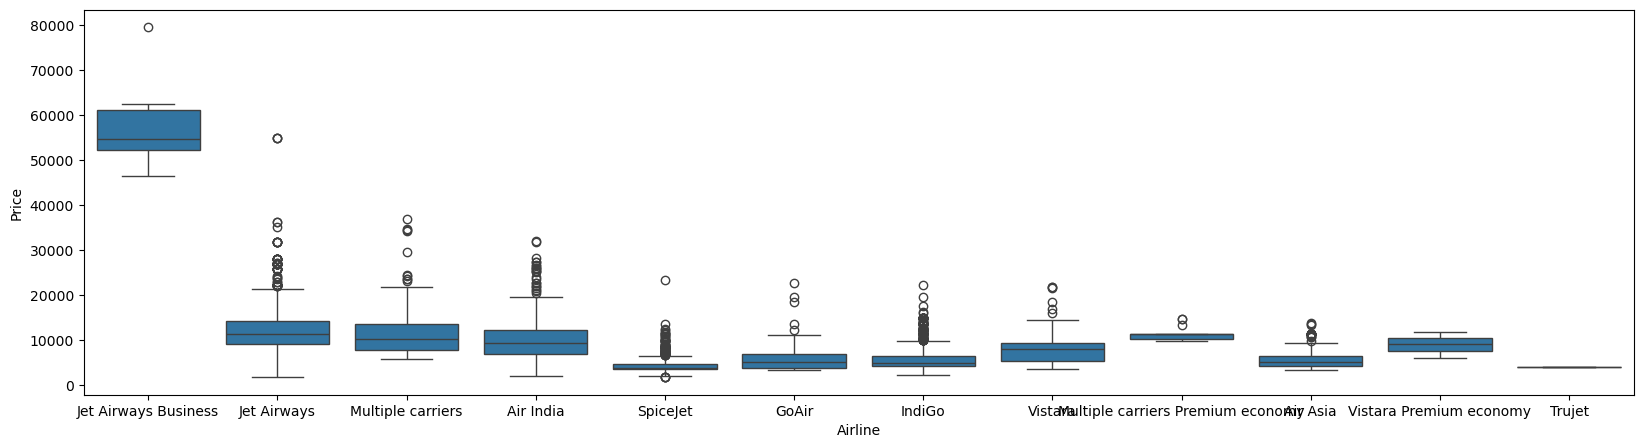

In [58]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending= False))

In [59]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month', 'Arr_hour',
       'Arr_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hr', 'Duration_min'],
      dtype='object')

<Axes: xlabel='Total_Stops', ylabel='Price'>

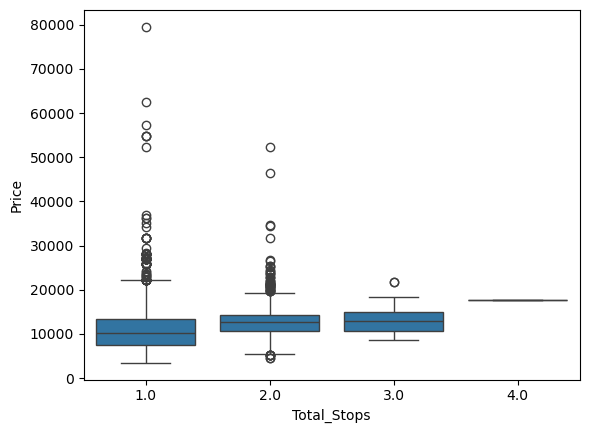

In [60]:
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending= False))

In [61]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [62]:
Airline=pd.get_dummies(cat_data['Airline'],drop_first=True) 

In [63]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [64]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

In [65]:
Source=pd.get_dummies(cat_data['Source'],drop_first=True)

In [66]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [67]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [68]:
cat_data['route_1']=cat_data['Route'].str.split('->').str[0]

In [69]:
cat_data.head()

,Airline,Source,Destination,Route,Additional_Info,route_1
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR → DEL
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU → IXR → BBI → BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL → LKO → BOM → COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU → NAG → BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR → NAG → DEL
